In [ ]:
import pandas as pd


train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./sample_submission.csv')

print("Datasets loaded successfully!")


Datasets loaded successfully!


# Importing Libraries

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.1 MB/s eta 0:00:00


In [ ]:
pip install imbalanced-learn

In [ ]:
## Data Collection and Manipulation
import pandas as pd
import numpy as np

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import re
import emoji

# UnderSampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
## Model Creation
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Load the Data

In [ ]:

train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train.drop("id", axis=1, inplace=True)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \r\n\r\n The title is fine as i...
2,00013b17ad220c46,""" \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_y = pd.read_csv("./test_labels.csv")
test_y.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
test = pd.merge(test, test_y, on = "id")
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \r\n\r\n The title is fine as i...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [ ]:
test = test.drop(test[test["toxic"] == -1].index)
test.drop("id", axis=1, inplace=True)
test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,:Dear god this site is horrible.,0,0,0,0,0,0
11,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,""" \r\n\r\n It says it right there that it IS a...",0,0,0,0,0,0
14,""" \r\n\r\n == Before adding a new product to t...",0,0,0,0,0,0


In [ ]:
train["toxic"].value_counts()

,count
toxic,
0,144277
1,15294


In [ ]:
test["toxic"].value_counts()

,count
toxic,
0,57888
1,6090


# Exploratory Data Analysis (EDA)

<Axes: xlabel='comment_text'>

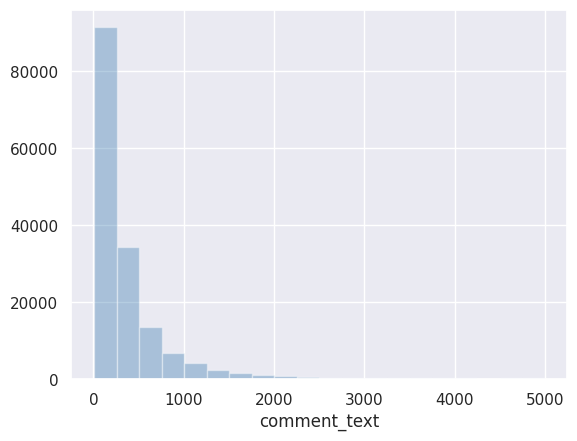

In [ ]:
sns.set(color_codes=True)
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [ ]:
train_labels = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
label_count = train_labels.sum()

<Axes: title={'center': 'Labels Frequency'}>

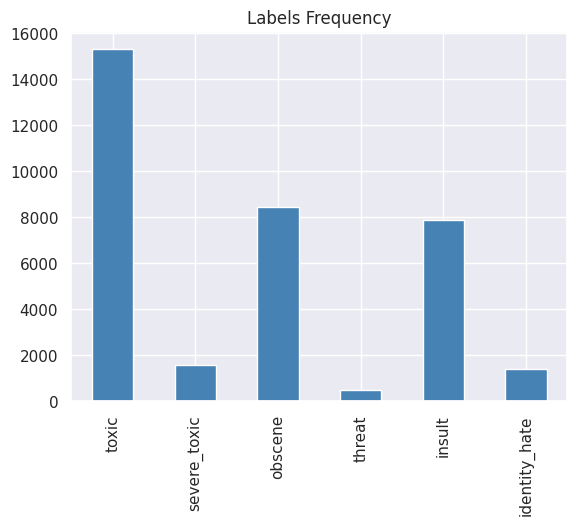

In [ ]:
label_count.plot(kind='bar', title='Labels Frequency', color='steelblue')

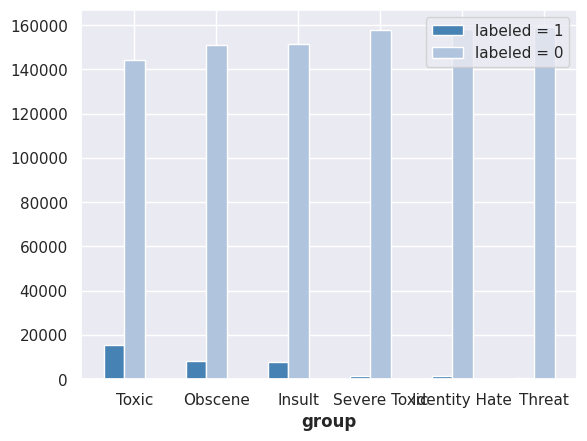

In [ ]:
barWidth = 0.25

bars1 = [sum(train['toxic'] == 1), sum(train['obscene'] == 1), sum(train['insult'] == 1), sum(train['severe_toxic'] == 1),
         sum(train['identity_hate'] == 1), sum(train['threat'] == 1)]
bars2 = [sum(train['toxic'] == 0), sum(train['obscene'] == 0), sum(train['insult'] == 0), sum(train['severe_toxic'] == 0),
         sum(train['identity_hate'] == 0), sum(train['threat'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate',
                                                       'Threat'])
plt.legend()
plt.show()

<Axes: >

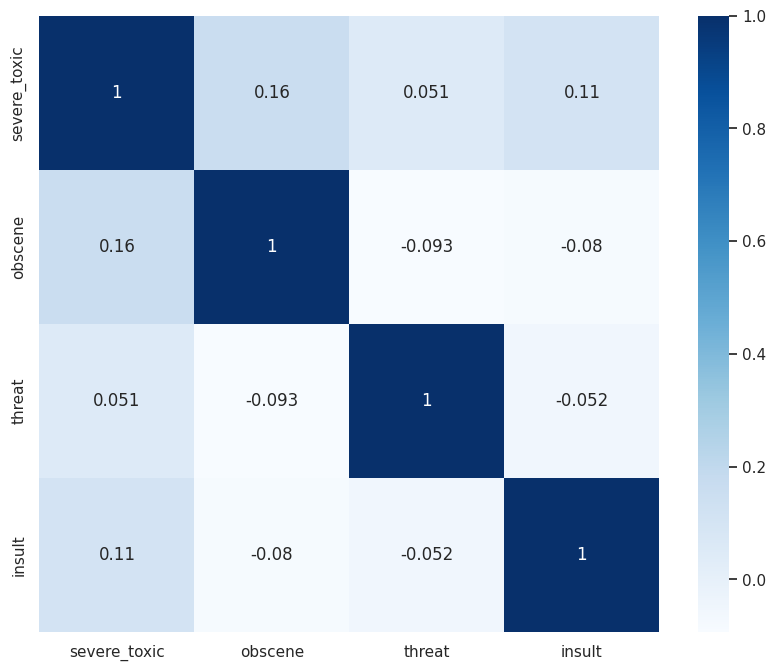

In [ ]:
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

# Data Preprocessing

In [ ]:
train.isnull().sum()

,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
test.isnull().sum()

,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
import nltk
nltk.download('wordnet')


def preprocess_text(text,remove_repeat_text=True, remove_patterns_text=True, is_lower=True):

    if is_lower:
      text=text.lower()

    if remove_repeat_text:
      text = re.sub(r'(.)\1{2,}', r'\1', text)

    if isinstance(text, list):
        text = ' '.join(text)


    text = str(text).replace("\n", " ")


    text = re.sub(r'[^\w\s]',' ',text)


    text = re.sub('[0-9]',"",text)


    text = re.sub(" +", " ", text)


    text = re.sub("([^\x00-\x7F])+"," ",text)




    return text

train["cleaned_comments"] = train["comment_text"].apply(preprocess_text)
test["cleaned_comments"] = test["comment_text"].apply(preprocess_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train["cleaned_comments"][0]

'explanation\r why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now '

In [ ]:
test.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_comments
5,Thank you for understanding. I think very high...,0,0,0,0,0,0,thank you for understanding i think very highl...
7,:Dear god this site is horrible.,0,0,0,0,0,0,dear god this site is horrible
11,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0,somebody will invariably try to add religion ...
13,""" \r\n\r\n It says it right there that it IS a...",0,0,0,0,0,0,\r \r it says it right there that it is a typ...
14,""" \r\n\r\n == Before adding a new product to t...",0,0,0,0,0,0,\r \r before adding a new product to the list...


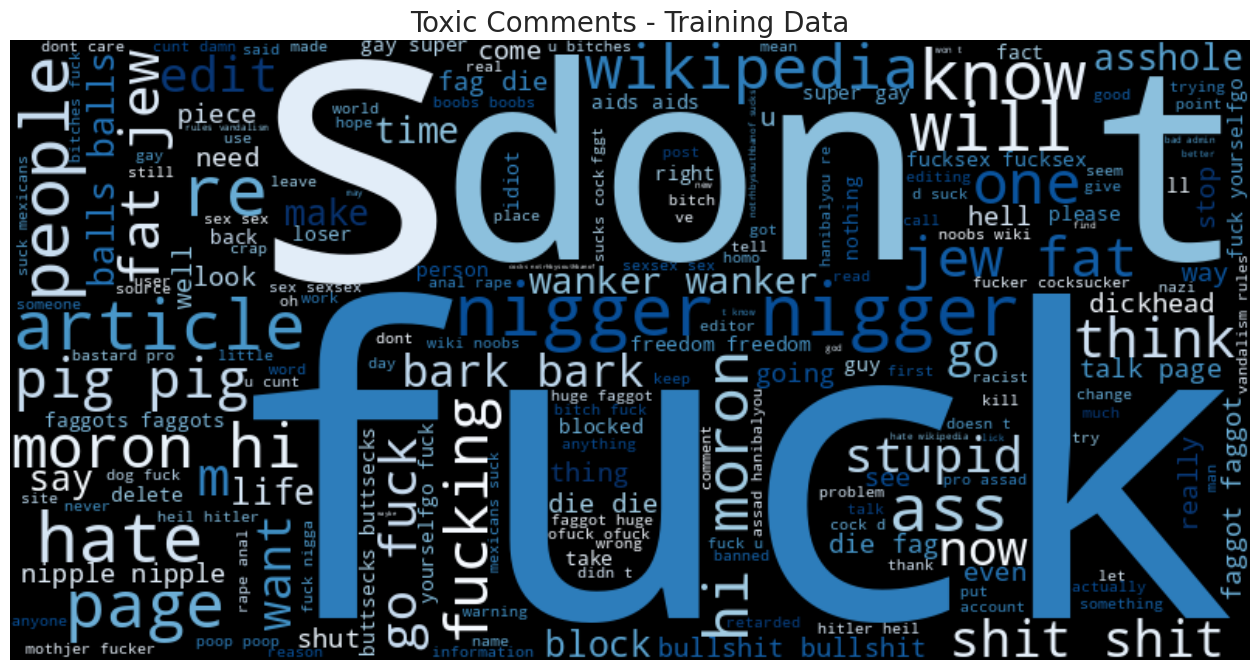

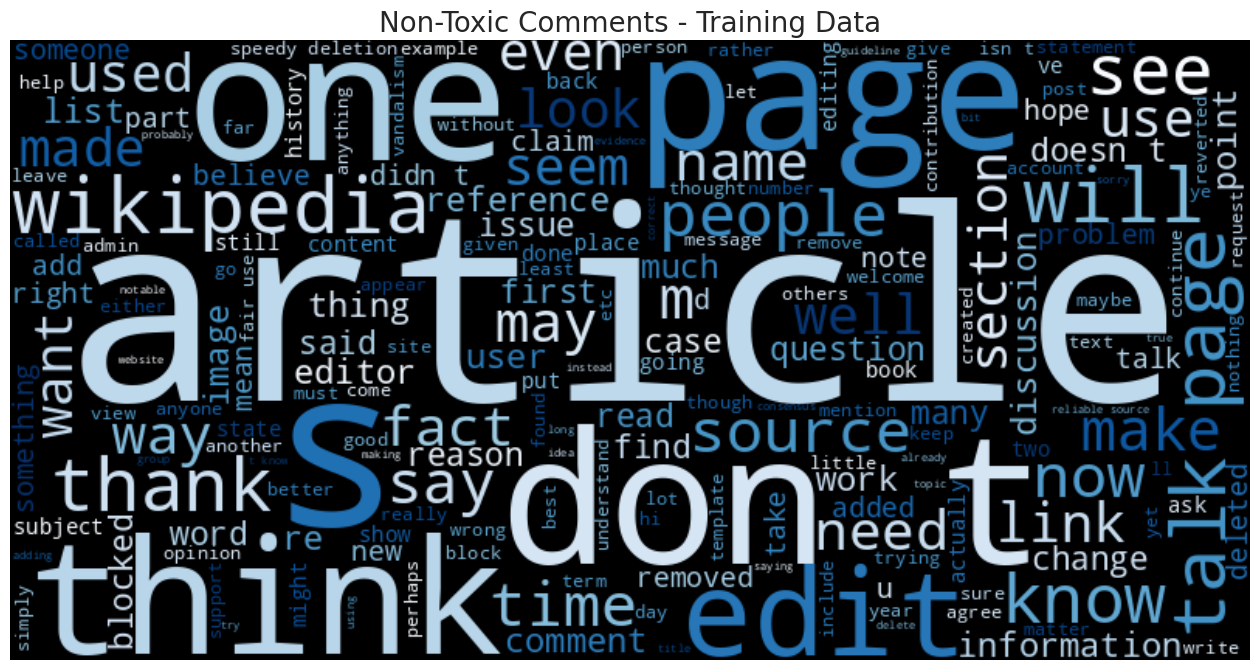

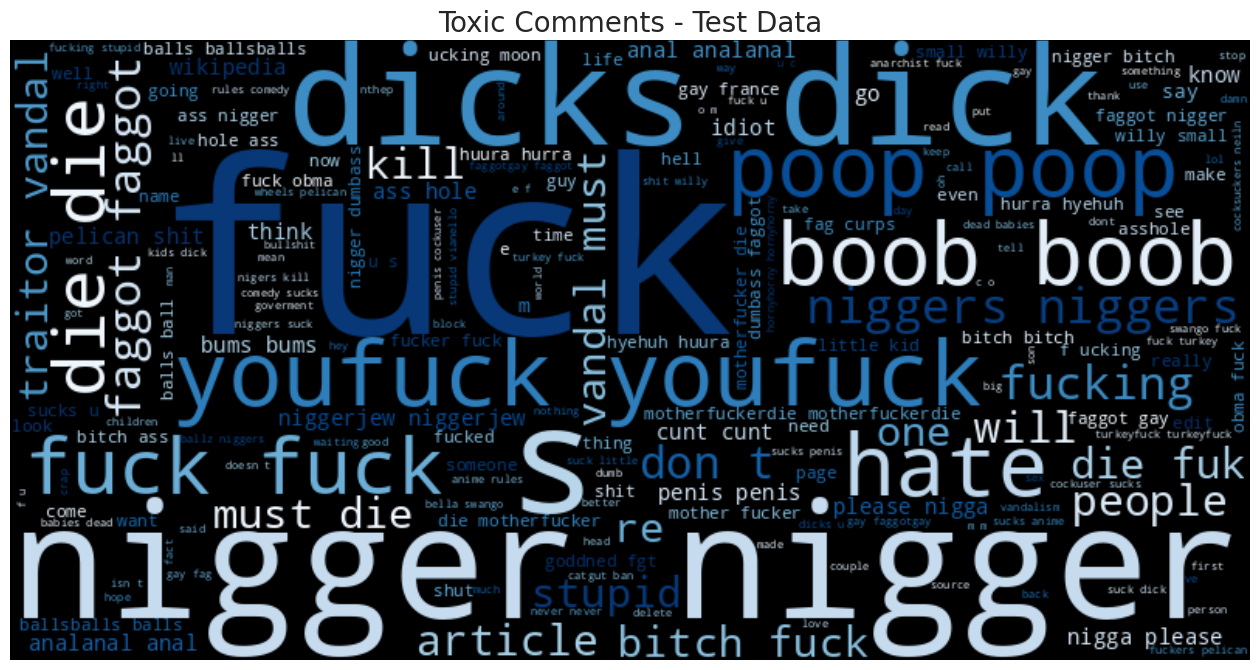

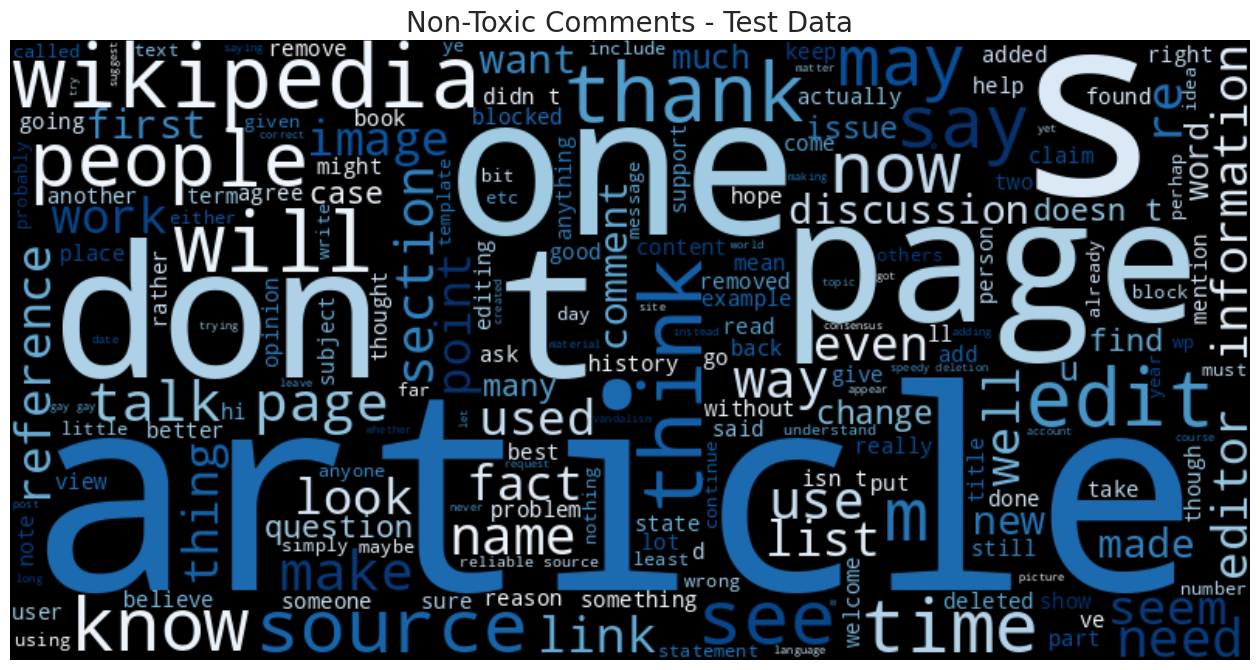

In [ ]:
def generate_wordcloud(data, label):
    text = ' '.join(data[data['toxic'] == label]['cleaned_comments'])
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    return wordcloud

# Training data word clouds
train_toxic_wordcloud = generate_wordcloud(train, 1)
train_nontoxic_wordcloud = generate_wordcloud(train, 0)

# Test data word clouds
test_toxic_wordcloud = generate_wordcloud(test, 1)
test_nontoxic_wordcloud = generate_wordcloud(test, 0)

# Plot the word clouds
plt.figure(figsize=(16, 12))

plt.imshow(train_toxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Toxic Comments - Training Data', size=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(train_nontoxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Non-Toxic Comments - Training Data', size=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(test_toxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Toxic Comments - Test Data', size=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(test_nontoxic_wordcloud.recolor(colormap="Blues"), interpolation='bilinear')
plt.title('Non-Toxic Comments - Test Data', size=20)
plt.axis('off')
plt.show()


In [ ]:
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):

    tokens = word_tokenize(text)


    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]


    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    preprocessed_text = " ".join(lemmatized_tokens)

    return preprocessed_text


train['comment_text'] = train['cleaned_comments'].apply(preprocess_text)
test['comment_text'] = test['cleaned_comments'].apply(preprocess_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train["cleaned_comments"][0]

'explanation\r why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now '

In [ ]:
train["comment_text"][0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired'

# UnderSampling

In [ ]:
X_train = train["comment_text"].values
y_train = np.array(train["toxic"])

In [ ]:
X_test = test["comment_text"].values
y_test = np.array(test["toxic"])

In [ ]:
print("Original training data distribution:", Counter(y_train))

Original training data distribution: Counter({0: 144277, 1: 15294})


In [ ]:
print("Original testing data distribution:", Counter(y_test))

Original testing data distribution: Counter({0: 57888, 1: 6090})


In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
X_resampled_train, y_resampled_train = rus.fit_resample(X_train.reshape(-1, 1), y_train)

In [ ]:
print("Sampling training data distribution:", Counter(y_resampled_train))

Sampling training data distribution: Counter({0: 15294, 1: 15294})


In [ ]:
X_resampled_test, y_resampled_test = rus.fit_resample(X_test.reshape(-1, 1), y_test)

In [ ]:
print("Sampling testing data distribution:", Counter(y_resampled_test))

Sampling testing data distribution: Counter({0: 6090, 1: 6090})


In [ ]:
X_resampled_train = pd.DataFrame(X_resampled_train, columns=["comment_text"])
y_resampled_train = pd.Series(y_resampled_train, name="toxic")

In [ ]:
X_resampled_test = pd.DataFrame(X_resampled_test, columns=["comment_text"])
y_resampled_test = pd.Series(y_resampled_test, name="toxic")

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
y_resampled_train

,toxic
0,0
1,0
2,0
3,0
4,0
...,...
30583,1
30584,1
30585,1
30586,1


In [ ]:
X_resampled_test

,comment_text
0,formatting nice requires lot patience would better u try previous list well though know tedious job u
1,clear answer sort situation tend towards view letting blocked editor find keep creating sockpuppets blocked matter edits stay anyway encourages keep socking whereas letting find waste time whatever sockpuppets get reverted deleted encourages stop reason usually delete situation however see case view useful image still useful even though uploaded violation block criticise take different view editor us pseudonym
2,since edit warring article going time editor often involved reverting banned continuing edit act impact account well two others group ip information seen administrator noticeboard listing permanent link course prevent editing talk page join consensus discussion development article time go editor engage dispute resolution without additional problem restriction may lifted meant endorse particular version article avoid continuous overriding content inappropriate mean resolving dispute problem continues next step may block editor involved shut article editing
3,copyright violation upload others image call infringing copyright edits reverted
4,inserted edit unknown user following passage andrica conjecture rewritten simply state inserted see expression simply simpler provided text please discus
...,...
12175,sorry dickhead cannae help douche bag dumbass bitch boy please would like change lifeless loser
12176,nigel crazy idiot
12177,fourth baldrick possibly cleverer made anyone else share belief proof fourth baldrick stupidity possibly show clever small indeed
12178,iran right iran drone spreading homosexual western idea iran call bone drone get used fabulous bearded mullah let say wording used recent iran incident misleading best people know international airspace start nautical mile coast saying incident supposedly definitely keep supposedly unless believe professional liar spin doctor feed like word dog surprise considering massive influx right wing scum shill provocateur invaded wikipedia past year turned cesspool happened mile iran make sense make sense tell god damned mother fucking truth say supposedly occurred four mile iranian air space usa supposedly using expensive operate piece military equipment surveillance recon open ocean water navy bird watching flora fauna type shit especially close iran extensive military industrial facility leader totally admitted violate iran airspace time continue despite loss drone supposedly hacked whatever happened hello mr semi retired biased rash inflammatory speculative antagonistic sensationalist article cited actually back modification made incident occurred supposedly mile iran air space better source might christian science monitor article recently published issue much thorough lack sensationalism article mr right wing nut job liked eye eye semen


In [ ]:
X_train_resampled, X_val_resampled, y_train_resampled, y_val_resampled = train_test_split(
    X_resampled_train["comment_text"],
    y_resampled_train,
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train_resampled

,comment_text
26276,feel argument dumb please feel free disappear miss national bias point day rigged poll ran mega cd page rename non notable yank name without editor aware time respond refute name change another snatch grab name nationalist yank
27921,shut fuck kiss as bitch fuck talking talking suck dick gay tyou
14524,seder sunday show ending sure belongs majority report article sam seder show article last sunday show aar june according website
6632,february utc eh hate marketing speak experience subjective anyway see perceived value generated reading watching otherwise experiencing form medium objective case one may well use medium regardless someone know etymology word add section e mail conversation richard stallman suggested derived noun suffix used nutrition fat content etc wondering whether content sense actually americanism american plural case content often arbitrarily switch singular abstract word content course know asking someone knowledgeable subject write one
7012,rollback october fyi nishidani rollback october
...,...
29802,fuck wish public property
5390,fear day simple computer program take job wife world talk
860,non canonical oz work royal historian title sentence give wrong impression royal historian wrote oz related work generally considered canonical oz fan spoken regard oz book royal historian canonical regard canonicity based whether reilly lee publisher
15795,piss p s bimbo


In [ ]:
X_val_resampled

,comment_text
16303,wack pack fucking insane drunk power instead totally removing big howard stern guy like crackhead bob fred elephant boy remove part majesty find offensive
6576,hornswaggle popular mi spell due juggalo championshit wrestling wrestler named hornswaggling hillbilly
18911,revert lot people work improve wiki motherfucker dare block user user reverted destructive activite shame shitface anna frodesiak
624,happy anniversary frickative hope arrive time see start next five year fine style
7739,note one previous comment knowledge remembrence cage bloody nose national treasure correct wrong fairly sure
...,...
8489,downfall ben ali regime due street action unique modern arab history dubious assertion one well cited autocratic regime good cause worried repercussion begun mahgreb levant
2790,source pilsen wellness center article thank advice use illinois audit edit article pilsen wellness center found medium report discussed audit could please go back rsn comment fox news link thank
29734,thanks hard work look small penis faggot better watch mouth going get knocked fuck wiki fuking pedia watch watch life hit facebook fag
3305,another alternative title would alcohol law


In [ ]:
X_resampled_test

,comment_text
0,formatting nice requires lot patience would better u try previous list well though know tedious job u
1,clear answer sort situation tend towards view letting blocked editor find keep creating sockpuppets blocked matter edits stay anyway encourages keep socking whereas letting find waste time whatever sockpuppets get reverted deleted encourages stop reason usually delete situation however see case view useful image still useful even though uploaded violation block criticise take different view editor us pseudonym
2,since edit warring article going time editor often involved reverting banned continuing edit act impact account well two others group ip information seen administrator noticeboard listing permanent link course prevent editing talk page join consensus discussion development article time go editor engage dispute resolution without additional problem restriction may lifted meant endorse particular version article avoid continuous overriding content inappropriate mean resolving dispute problem continues next step may block editor involved shut article editing
3,copyright violation upload others image call infringing copyright edits reverted
4,inserted edit unknown user following passage andrica conjecture rewritten simply state inserted see expression simply simpler provided text please discus
...,...
12175,sorry dickhead cannae help douche bag dumbass bitch boy please would like change lifeless loser
12176,nigel crazy idiot
12177,fourth baldrick possibly cleverer made anyone else share belief proof fourth baldrick stupidity possibly show clever small indeed
12178,iran right iran drone spreading homosexual western idea iran call bone drone get used fabulous bearded mullah let say wording used recent iran incident misleading best people know international airspace start nautical mile coast saying incident supposedly definitely keep supposedly unless believe professional liar spin doctor feed like word dog surprise considering massive influx right wing scum shill provocateur invaded wikipedia past year turned cesspool happened mile iran make sense make sense tell god damned mother fucking truth say supposedly occurred four mile iranian air space usa supposedly using expensive operate piece military equipment surveillance recon open ocean water navy bird watching flora fauna type shit especially close iran extensive military industrial facility leader totally admitted violate iran airspace time continue despite loss drone supposedly hacked whatever happened hello mr semi retired biased rash inflammatory speculative antagonistic sensationalist article cited actually back modification made incident occurred supposedly mile iran air space better source might christian science monitor article recently published issue much thorough lack sensationalism article mr right wing nut job liked eye eye semen


# Model Building

In [ ]:
import torch

target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Split Data
X_train, X_val, y_train, y_val = train_test_split(
    train['cleaned_comments'], train[target_columns], test_size=0.1, random_state=42
)

X_test = test['cleaned_comments']
y_test = test[target_columns]

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode(data, tokenizer, max_length=150):
    encoded_data = tokenizer.batch_encode_plus(
        data.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    return encoded_data['input_ids'], encoded_data['attention_mask']

# Encode Datasets
X_train_input_ids, X_train_attention_masks = encode(X_train, tokenizer)
X_val_input_ids, X_val_attention_masks = encode(X_val, tokenizer)
X_test_input_ids, X_test_attention_masks = encode(X_test, tokenizer)

# Ensure all labels match input batch sizes
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

# Create DataLoaders
batch_size = 16

train_data = TensorDataset(X_train_input_ids, X_train_attention_masks, y_train)
train_dataloader = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size=batch_size)

val_data = TensorDataset(X_val_input_ids, X_val_attention_masks, y_val)
val_dataloader = DataLoader(val_data, sampler=SequentialSampler(val_data), batch_size=batch_size)

test_data = TensorDataset(X_test_input_ids, X_test_attention_masks, y_test)
test_dataloader = DataLoader(test_data, sampler=SequentialSampler(test_data), batch_size=batch_size)


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Define BERT Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(target_columns))
model = model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Define Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training Loop
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(model.device) for t in batch)
        model.zero_grad()
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Training Loss: {avg_loss:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
Training Loss: 0.0478
Epoch 2/5
Training Loss: 0.0338
Epoch 3/5
Training Loss: 0.0267
Epoch 4/5
Training Loss: 0.0208
Epoch 5/5
Training Loss: 0.0166


In [ ]:
# Evaluate on Test Data
model.eval()
test_preds, test_labels = [], []
with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(model.device) for t in batch)
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        test_preds.append(torch.sigmoid(logits).cpu().numpy())
        test_labels.append(batch_labels.cpu().numpy())

test_preds = np.vstack(test_preds)
test_labels = np.vstack(test_labels)
print("Test AUC:", roc_auc_score(test_labels, test_preds, average='macro'))

Test AUC: 0.9794722939747569


In [ ]:
# Multi-label classification report and metrics
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

# Define target column names
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Evaluate on Test Data
model.eval()
test_preds, test_labels = [], []
with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(model.device) for t in batch)
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        test_preds.append(torch.sigmoid(logits).cpu().numpy())
        test_labels.append(batch_labels.cpu().numpy())

# Convert predictions and labels to arrays
test_preds = np.vstack(test_preds)
test_labels = np.vstack(test_labels)

# Initialize metrics
macro_auc = 0
optimal_thresholds = []  # Store the best threshold for each label

print("\nClassification Reports for Each Label:")
for i, label in enumerate(target_columns):
    print(f"\nLabel: {label}")
    true_labels = test_labels[:, i]
    predicted_probs = test_preds[:, i]

    # Tune threshold using precision-recall curve
    precision, recall, thresholds = precision_recall_curve(true_labels, predicted_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    optimal_idx = f1_scores.argmax()  # Find the index with the best F1 score
    optimal_threshold = thresholds[optimal_idx] if len(thresholds) > 0 else 0.5
    optimal_thresholds.append(optimal_threshold)

    # Predict labels using the optimized threshold
    predicted_labels = (predicted_probs > optimal_threshold).astype(int)

    # Generate classification report
    print(classification_report(true_labels, predicted_labels, target_names=[f"Non-{label}", label]))

    # Calculate AUC score for the current label
    auc = roc_auc_score(true_labels, predicted_probs)
    print(f"AUC: {auc:.4f}")
    print(f"Optimal Threshold for {label}: {optimal_threshold:.2f}")
    macro_auc += auc

# Calculate Macro-Average AUC
macro_auc /= len(target_columns)
print(f"\nMacro Average AUC: {macro_auc:.4f}")

# Calculate overall metrics (averaged across labels) using tuned thresholds
predicted_labels = np.zeros_like(test_preds)
for i in range(test_preds.shape[1]):
    predicted_labels[:, i] = (test_preds[:, i] > optimal_thresholds[i]).astype(int)

# Flatten predictions and labels for overall metrics
accuracy = accuracy_score(test_labels.flatten(), predicted_labels.flatten())
precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')

print(f"\nOverall Metrics (Using Tuned Thresholds):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Classification Reports for Each Label:

Label: toxic
              precision    recall  f1-score   support

   Non-toxic       0.98      0.95      0.96     57888
       toxic       0.64      0.78      0.70      6090

    accuracy                           0.94     63978
   macro avg       0.81      0.87      0.83     63978
weighted avg       0.94      0.94      0.94     63978

AUC: 0.9653
Optimal Threshold for toxic: 0.79

Label: severe_toxic
                  precision    recall  f1-score   support

Non-severe_toxic       1.00      0.99      1.00     63611
    severe_toxic       0.33      0.56      0.42       367

        accuracy                           0.99     63978
       macro avg       0.66      0.78      0.71     63978
    weighted avg       0.99      0.99      0.99     63978

AUC: 0.9880
Optimal Threshold for severe_toxic: 0.61

Label: obscene
              precision    recall  f1-score   support

 Non-obscene       0.98      0.98      0.98     60287
     obscene       0.68

In [ ]:
# Save Model
torch.save(model.state_dict(), "bert_toxicity_model.pth")
tokenizer.save_pretrained('./bert_tokenizer')

('./bert_tokenizer/tokenizer_config.json',
 './bert_tokenizer/special_tokens_map.json',
 './bert_tokenizer/vocab.txt',
 './bert_tokenizer/added_tokens.json')

In [ ]:
def predict_toxicity(text, model, tokenizer, target_columns, optimal_thresholds, max_length=150):
    """
    Predict whether a given text is toxic or non-toxic using a fine-tuned BERT model.

    Args:
        text (str): Input text to be classified.
        model: Fine-tuned BERT model.
        tokenizer: Tokenizer used for the BERT model.
        target_columns (list): List of target labels.
        optimal_thresholds (list): Thresholds tuned for each label.
        max_length (int): Maximum token length for BERT input.

    Returns:
        dict: A dictionary containing the toxicity classification for each label.
    """
    model.eval()

    # Preprocess and tokenize the input text
    encoded_input = tokenizer(
        text,
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )
    input_ids = encoded_input['input_ids'].to(model.device)
    attention_mask = encoded_input['attention_mask'].to(model.device)

    # Perform prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.sigmoid(logits).cpu().numpy()[0]  # Convert to probabilities

    # Determine toxicity based on thresholds
    prediction = {}
    for i, label in enumerate(target_columns):
        is_toxic = probabilities[i] > optimal_thresholds[i]
        prediction[label] = "Toxic" if is_toxic else "Non-Toxic"

    return prediction

# Example Usage
text = "You are sick"
predictions = predict_toxicity(text, model, tokenizer, target_columns, optimal_thresholds)
print(f"Predictions for '{text}':")
for label, result in predictions.items():
    print(f"{label}: {result}")


Predictions for 'You are sick':
toxic: Toxic
severe_toxic: Non-Toxic
obscene: Non-Toxic
threat: Non-Toxic
insult: Non-Toxic
identity_hate: Non-Toxic
